In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread
from csbdeep.utils import Path, download_and_extract_zip_file, plot_some
from csbdeep.io import save_tiff_imagej_compatible
from csbdeep.models import CARE

Using TensorFlow backend.


In [2]:
download_and_extract_zip_file (
    url       = 'http://csbdeep.bioimagecomputing.com/example_data/tribolium.zip',
    targetdir = 'data',
)


Files found, nothing to download.

data:
- tribolium
- tribolium/test
- tribolium/test/GT
- tribolium/test/GT/nGFP_0.1_0.2_0.5_20_14_late.tif
- tribolium/test/low
- tribolium/test/low/nGFP_0.1_0.2_0.5_20_14_late.tif
- tribolium/train
- tribolium/train/GT
- tribolium/train/GT/nGFP_0.1_0.2_0.5_20_13_late.tif
- tribolium/train/low
- tribolium/train/low/nGFP_0.1_0.2_0.5_20_13_late.tif


image size = (45, 954, 486)
image axes = ZYX


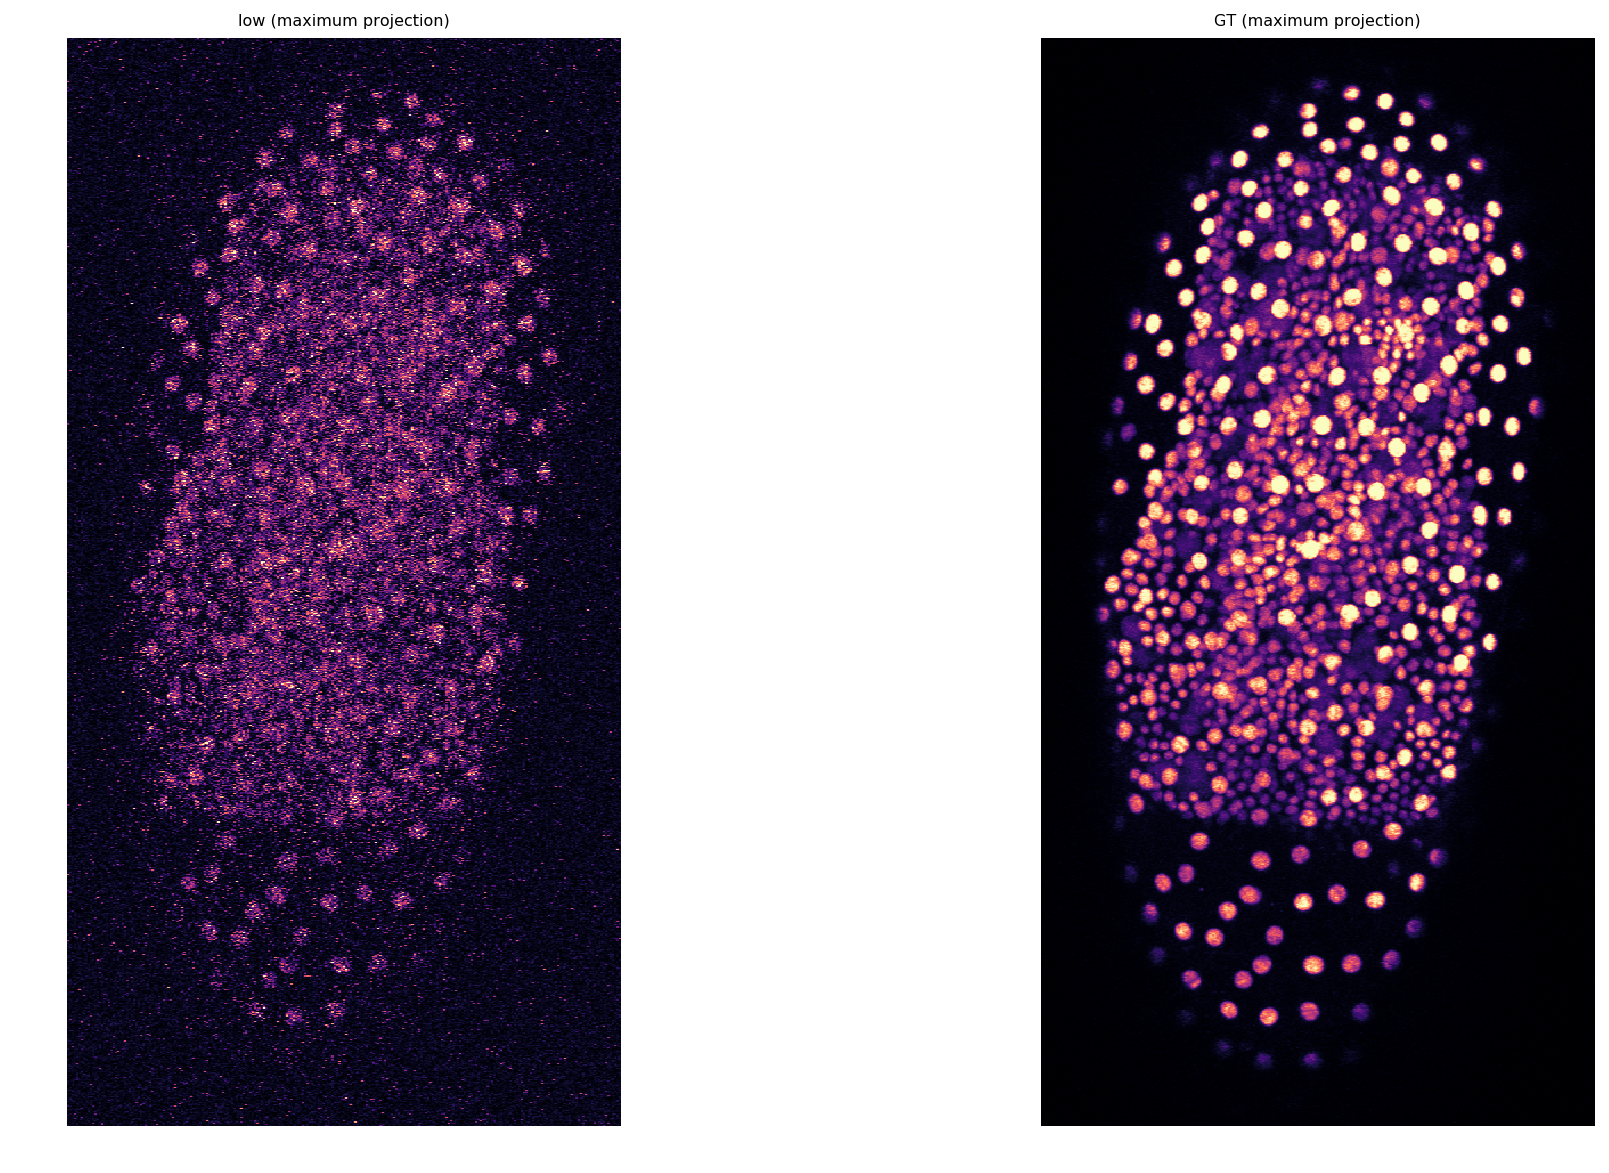

In [3]:
y = imread('data/tribolium/test/GT/nGFP_0.1_0.2_0.5_20_14_late.tif')
x = imread('data/tribolium/test/low/nGFP_0.1_0.2_0.5_20_14_late.tif')

axes = 'ZYX'
print('image size =', x.shape)
print('image axes =', axes)

plt.figure(figsize=(16,10))
plot_some(np.stack([x,y]),
          title_list=[['low (maximum projection)','GT (maximum projection)']], 
          pmin=2,pmax=99.8);

In [4]:
model = CARE(config=None, name='my_model', basedir='models')

Loading network weights from 'weights_best.h5'.


In [5]:
restored = model.predict(x, axes)

Out of memory, retrying with n_tiles = (1, 2, 1)


100%|██████████| 2/2 [00:09<00:00,  4.51s/it]  


In [6]:
%%time
restored = model.predict(x, axes, n_tiles=(1,4,4))

100%|██████████| 16/16 [00:10<00:00,  3.43it/s] 


CPU times: user 1min, sys: 4.86 s, total: 1min 5s
Wall time: 12.9 s


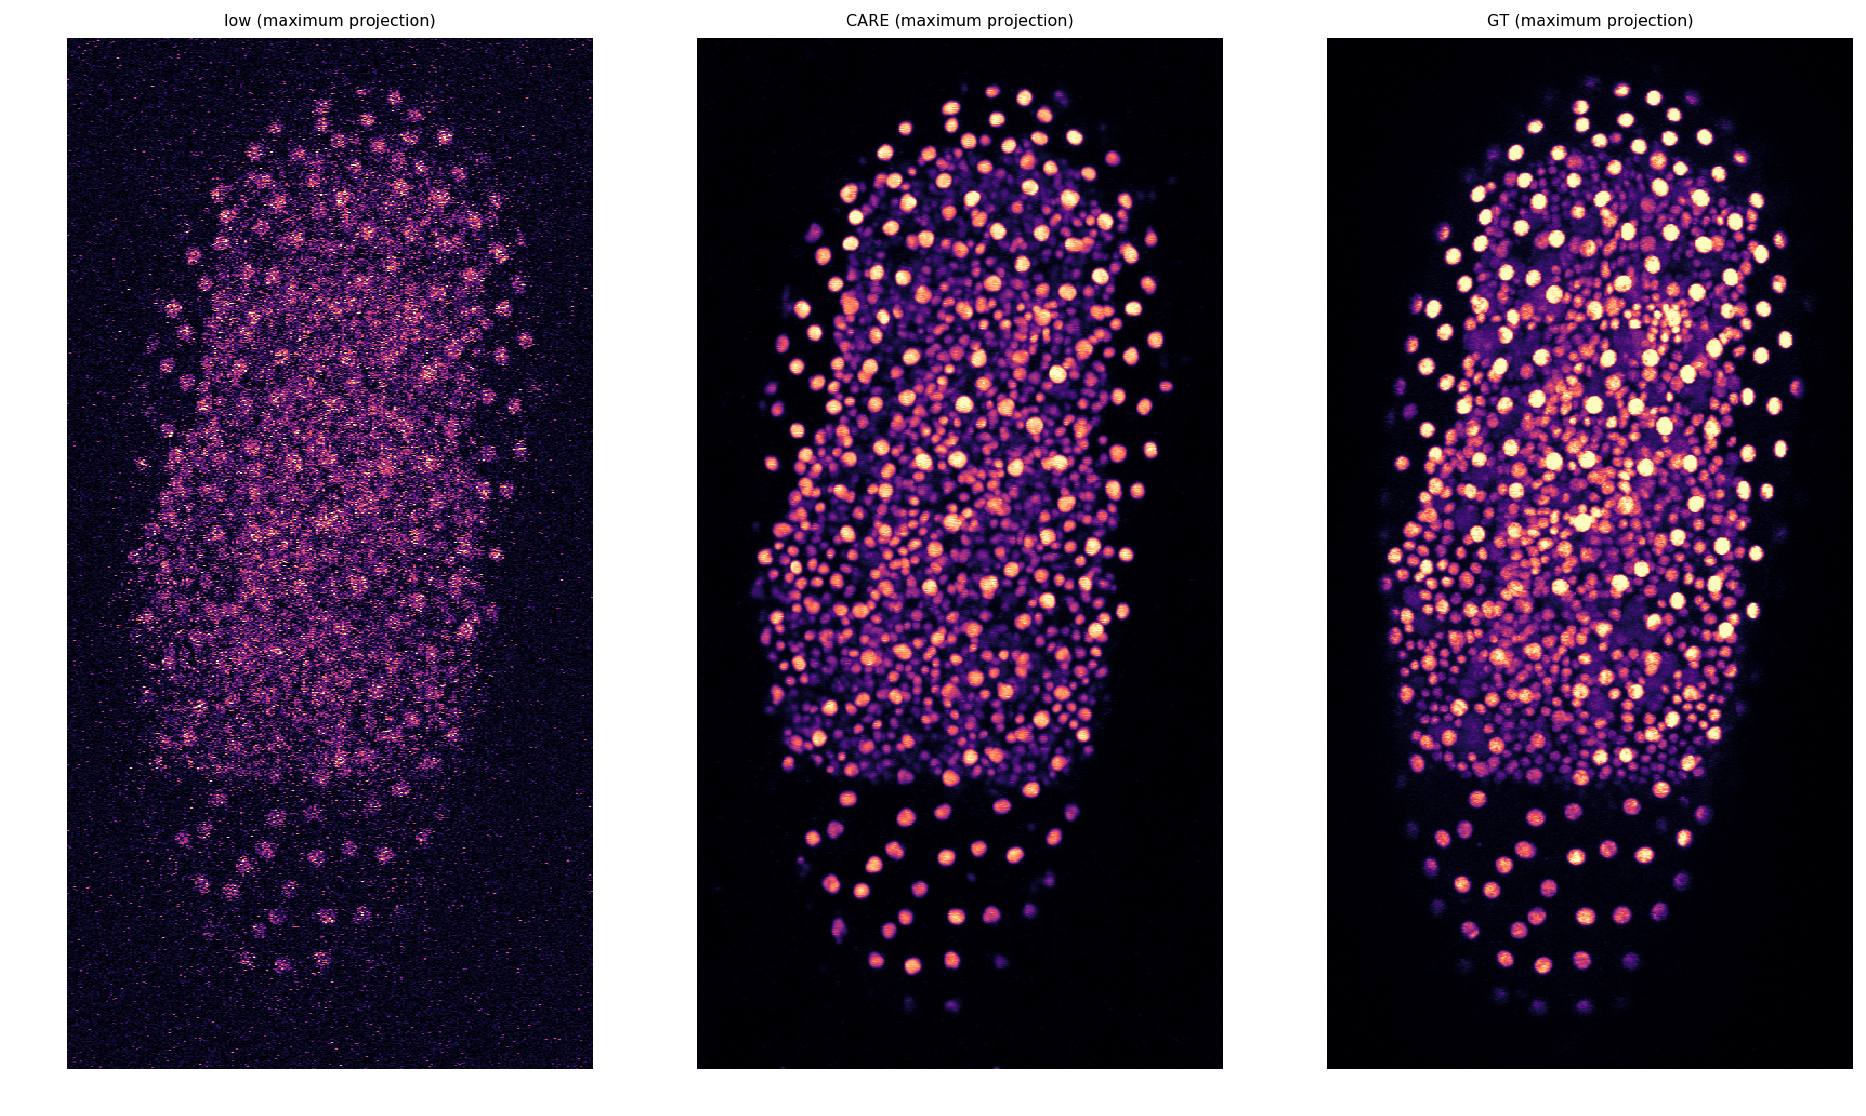

In [8]:
Path('results').mkdir(exist_ok=True)
save_tiff_imagej_compatible('results/%s_nGFP_0.1_0.2_0.5_20_14_late.tif' % model.name, restored, axes)

plt.figure(figsize=(16,10))
plot_some(np.stack([x,restored,y]),
          title_list=[['low (maximum projection)','CARE (maximum projection)','GT (maximum projection)']], 
          pmin=2,pmax=99.8);